Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Key-Forward"

position_role_stats = {
    'goal_scoring' : [
        'Goals',
        'Score',
        'xScore',
        'xScore_Diff',
        'Shots_At_Goal',
        'xT_received',
        'vaep_value_received',
        'offensive_value',
        'exp_vaep_value_received',
        'exp_offensive_value'
    ],
    'goal_creating' : [
        'Score_Involvements',
        'Score_Launches',
        'Inside_50s',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value'
    ],
    'contest' : [
        'Contested_Marks',
        'Contested_Possessions',
        'Offensive_One_On_One_Contests',
        'Offensive_Contest_Wins',
        'Inside_50_Ground_Ball_Gets',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

,,,Games,Age,Height,Weight,Debut_Year,Draft_Position,Shots_At_Goal_sum,vaep_value_sum,Contested_Possessions_sum,xT_received_sum,xScore_sum,Uncontested_Possessions_sum,vaep_value_received_sum,Score_sum,Score_Involvements_sum,offensive_value_sum,Score_Launches_sum,Offensive_Contest_Wins_sum,Possessions_sum,Inside_50_Ground_Ball_Gets_sum,exp_offensive_value_sum,Goals_sum,Contested_Marks_sum,Inside_50s_sum,xT_created_sum,exp_vaep_value_sum,xScore_Diff_sum,exp_vaep_value_received_sum,Offensive_One_On_One_Contests_sum,Percent_Played_sum,Shots_At_Goal_pergame,Shots_At_Goal_per100,vaep_value_pergame,vaep_value_per100,Contested_Possessions_pergame,Contested_Possessions_per100,xT_received_pergame,xT_received_per100,xScore_pergame,xScore_per100,Uncontested_Possessions_pergame,Uncontested_Possessions_per100,vaep_value_received_pergame,vaep_value_received_per100,Score_pergame,Score_per100,Score_Involvements_pergame,Score_Involvements_per100,offensive_value_pergame,offensive_value_per100,Score_Launches_pergame,Score_Launches_per100,Offensive_Contest_Wins_pergame,Offensive_Contest_Wins_per100,Possessions_pergame,Possessions_per100,Inside_50_Ground_Ball_Gets_pergame,Inside_50_Ground_Ball_Gets_per100,exp_offensive_value_pergame,exp_offensive_value_per100,Goals_pergame,Goals_per100,Contested_Marks_pergame,Contested_Marks_per100,Inside_50s_pergame,Inside_50s_per100,xT_created_pergame,xT_created_per100,exp_vaep_value_pergame,exp_vaep_value_per100,xScore_Diff_pergame,xScore_Diff_per100,exp_vaep_value_received_pergame,exp_vaep_value_received_per100,Offensive_One_On_One_Contests_pergame,Offensive_One_On_One_Contests_per100,Shots_At_Goal_per100_z,vaep_value_per100_z,Contested_Possessions_per100_z,xT_received_per100_z,xScore_per100_z,Uncontested_Possessions_per100_z,vaep_value_received_per100_z,Score_per100_z,Score_Involvements_per100_z,offensive_value_per100_z,Score_Launches_per100_z,Offensive_Contest_Wins_per100_z,Possessions_per100_z,Inside_50_Ground_Ball_Gets_per100_z,exp_offensive_value_per100_z,Goals_per100_z,Contested_Marks_per100_z,Inside_50s_per100_z,xT_created_per100_z,exp_vaep_value_per100_z,xScore_Diff_per100_z,exp_vaep_value_received_per100_z,Offensive_One_On_One_Contests_per100_z,goal_scoring_rating,goal_creating_rating,contest_rating,key_forward_rating
Player,Team,Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Taylor Walker,Adelaide,2021,13,31.000000,194.0,102.0,2009.0,75.0,71,23.983063,108,12.645316,226.067342,73,25.988761,242,106,25.188670,23.0,29.0,181,32.0,142.145727,36,27,33,-0.790512,127.011428,15.932658,194.086559,79.0,1096,5.461538,6.478102,1.844851,2.188236,8.307692,9.854015,0.972717,1.153770,17.389796,20.626582,5.615385,6.660584,1.999135,2.371237,18.615385,22.080292,8.153846,9.671533,1.937590,2.298236,1.769231,2.098540,2.230769,2.645985,13.923077,16.514599,2.461538,2.919708,10.934287,12.969501,2.769231,3.284672,2.076923,2.463504,2.538462,3.010949,-0.060809,-0.072127,9.770110,11.588634,1.225589,1.453710,14.929735,17.708628,6.076923,7.208029,2.235571,2.247603,1.801941,1.596574,1.698414,-0.304550,1.247616,1.769469,2.582342,2.234015,2.984953,3.456989,0.526218,2.654715,2.768268,1.611984,1.423875,0.549452,0.340534,2.493150,0.736127,2.111099,2.592744,1.800914,2.025040,1.735990,1.853981
Charlie Curnow,Carlton,2023,13,26.000000,194.0,94.0,2016.0,12.0,83,31.890268,95,12.442966,290.923215,92,36.720029,339,117,33.338199,6.0,17.0,187,16.0,161.726567,52,36,47,-1.328087,146.975934,48.076785,238.623363,61.0,1205,6.384615,6.887967,2.453098,2.646495,7.307692,7.883817,0.957151,1.032611,22.378709,24.143005,7.076923,7.634855,2.824618,3.047305,26.076923,28.132780,9.000000,9.709544,2.564477,2.766656,0.461538,0.497925,1.307692,1.410788,14.384615,15.518672,1.230769,1.327801,12.440505,13.421292,4.000000,4.315353,2.769231,2.987552,3.615385,3.900415,-0.102161,-0.110215,11.305841,12.197173,3.698214,3.989775,18.355643,19.802769,4.692308,5.062241,2.592435,3.444781,0.745222,1.135875,2.579989,-0.0

In [9]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

key_forward_rating                      \
Season                                              2021      2022      2023   
Player         Team                                                            
Charlie Curnow Carlton                          0.000000  0.000000  1.828102   
Taylor Walker  Adelaide                         1.853981  1.133619  0.000000   
Dustin Martin  Richmond                         0.507926  0.000000  0.593551   
Tom Hawkins    Geelong                          0.294456  0.667252  0.289644   
Aaron Naughton Western Bulldogs                 0.394079  0.540157  0.260205   
Jeremy Cameron Geelong                          0.713371  0.427521  0.257721   
Harry McKay    Carlton                          0.664021  0.319452  0.000000   
Joe Daniher    Brisbane Lions                   0.084058 -0.080303  0.284591   
Jesse Hogan    Greater Western Sydney           0.000000  0.275772  0.077683   
Mabior Chol    Gold Coast                       0.000000  0.331953  0.000000   
Max King       St Kilda                         0.000000  0.235904  0.000000   
Todd Marshall  Port Adelaide                    0.000000  0.176757  0.000000   
Matt Taberner  Fremantle                        0.253275  0.000000  0.000000   
Josh Bruce     Western Bulldogs                 0.248058  0.000000  0.000000   
Tom McDonald   Melbourne                        0.202416  0.000000  0.000000   
Mitch Lewis    Hawthorn                        -0.351362  0.159277  0.000000   
Sam Walsh      Carlton                          0.000000  0.039937  0.000000   
Sam Reid       Sydney                           0.000000  0.012350  0.000000   
Cale Hooker    Essendon                         0.032355  0.000000  0.000000   
Robbie Gray    Port Adelaide                   -0.004604  0.000000  0.000000   

                                      overall_key_forward_rating  
Season                                                            
Player         Team                                               
Charlie Curnow Carlton                                  1.096861  
Taylor Walker  Adelaide                                 0.525484  
Dustin Martin  Richmond                                 0.406923  
Tom Hawkins    Geelong                                  0.403408  
Aaron Naughton Western Bulldogs                         0.357578  
Jeremy Cameron Geelong                                  0.354226  
Harry McKay    Carlton                                  0.162238  
Joe Daniher    Brisbane Lions                           0.155070  
Jesse Hogan    Greater Western Sydney                   0.129341  
Mabior Chol    Gold Coast                               0.099586  
Max King       St Kilda                                 0.070771  
Todd Marshall  Port Adelaide                            0.053027  
Matt Taberner  Fremantle                                0.025328  
Josh Bruce     Western Bulldogs                         0.024806  
Tom McDonald   Melbourne                                0.020242  
Mitch Lewis    Hawthorn                                 0.012647  
Sam Walsh      Carlton                                  0.011981  
Sam Reid       Sydney                                   0.003705  
Cale Hooker    Essendon                                 0.003235  
Robbie Gray    Port Adelaide                           -0.000460

Visualise

In [ ]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

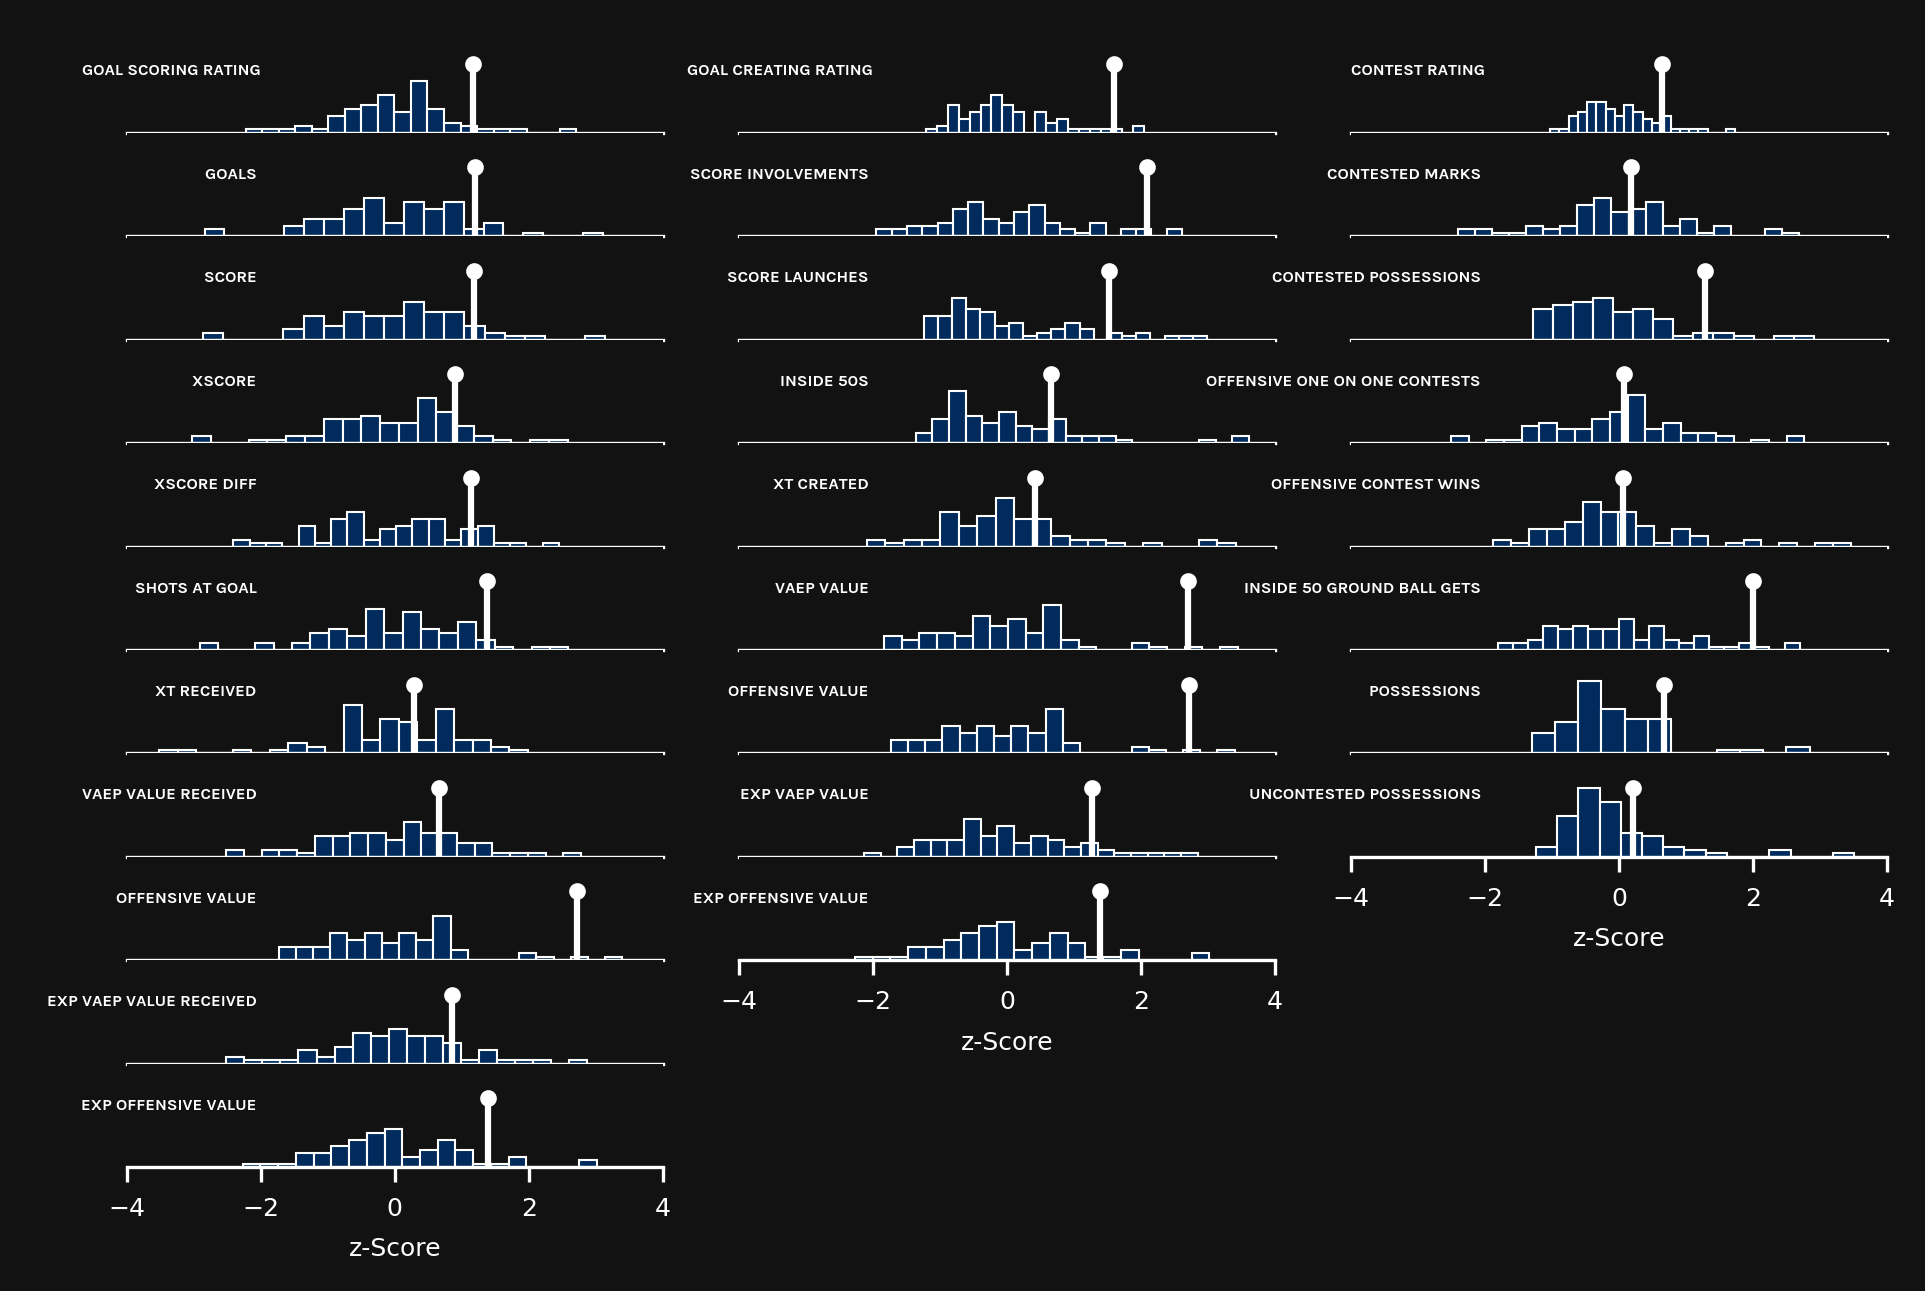

In [12]:
player = "Taylor Walker"
team = "Adelaide"
season = 2022

stats_list = [['goal_scoring_rating'] + position_role_stats_zscaled['goal_scoring'], 
              ['goal_creating_rating'] + position_role_stats_zscaled['goal_creating'], 
              ['contest_rating'] + position_role_stats_zscaled['contest']]

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4)

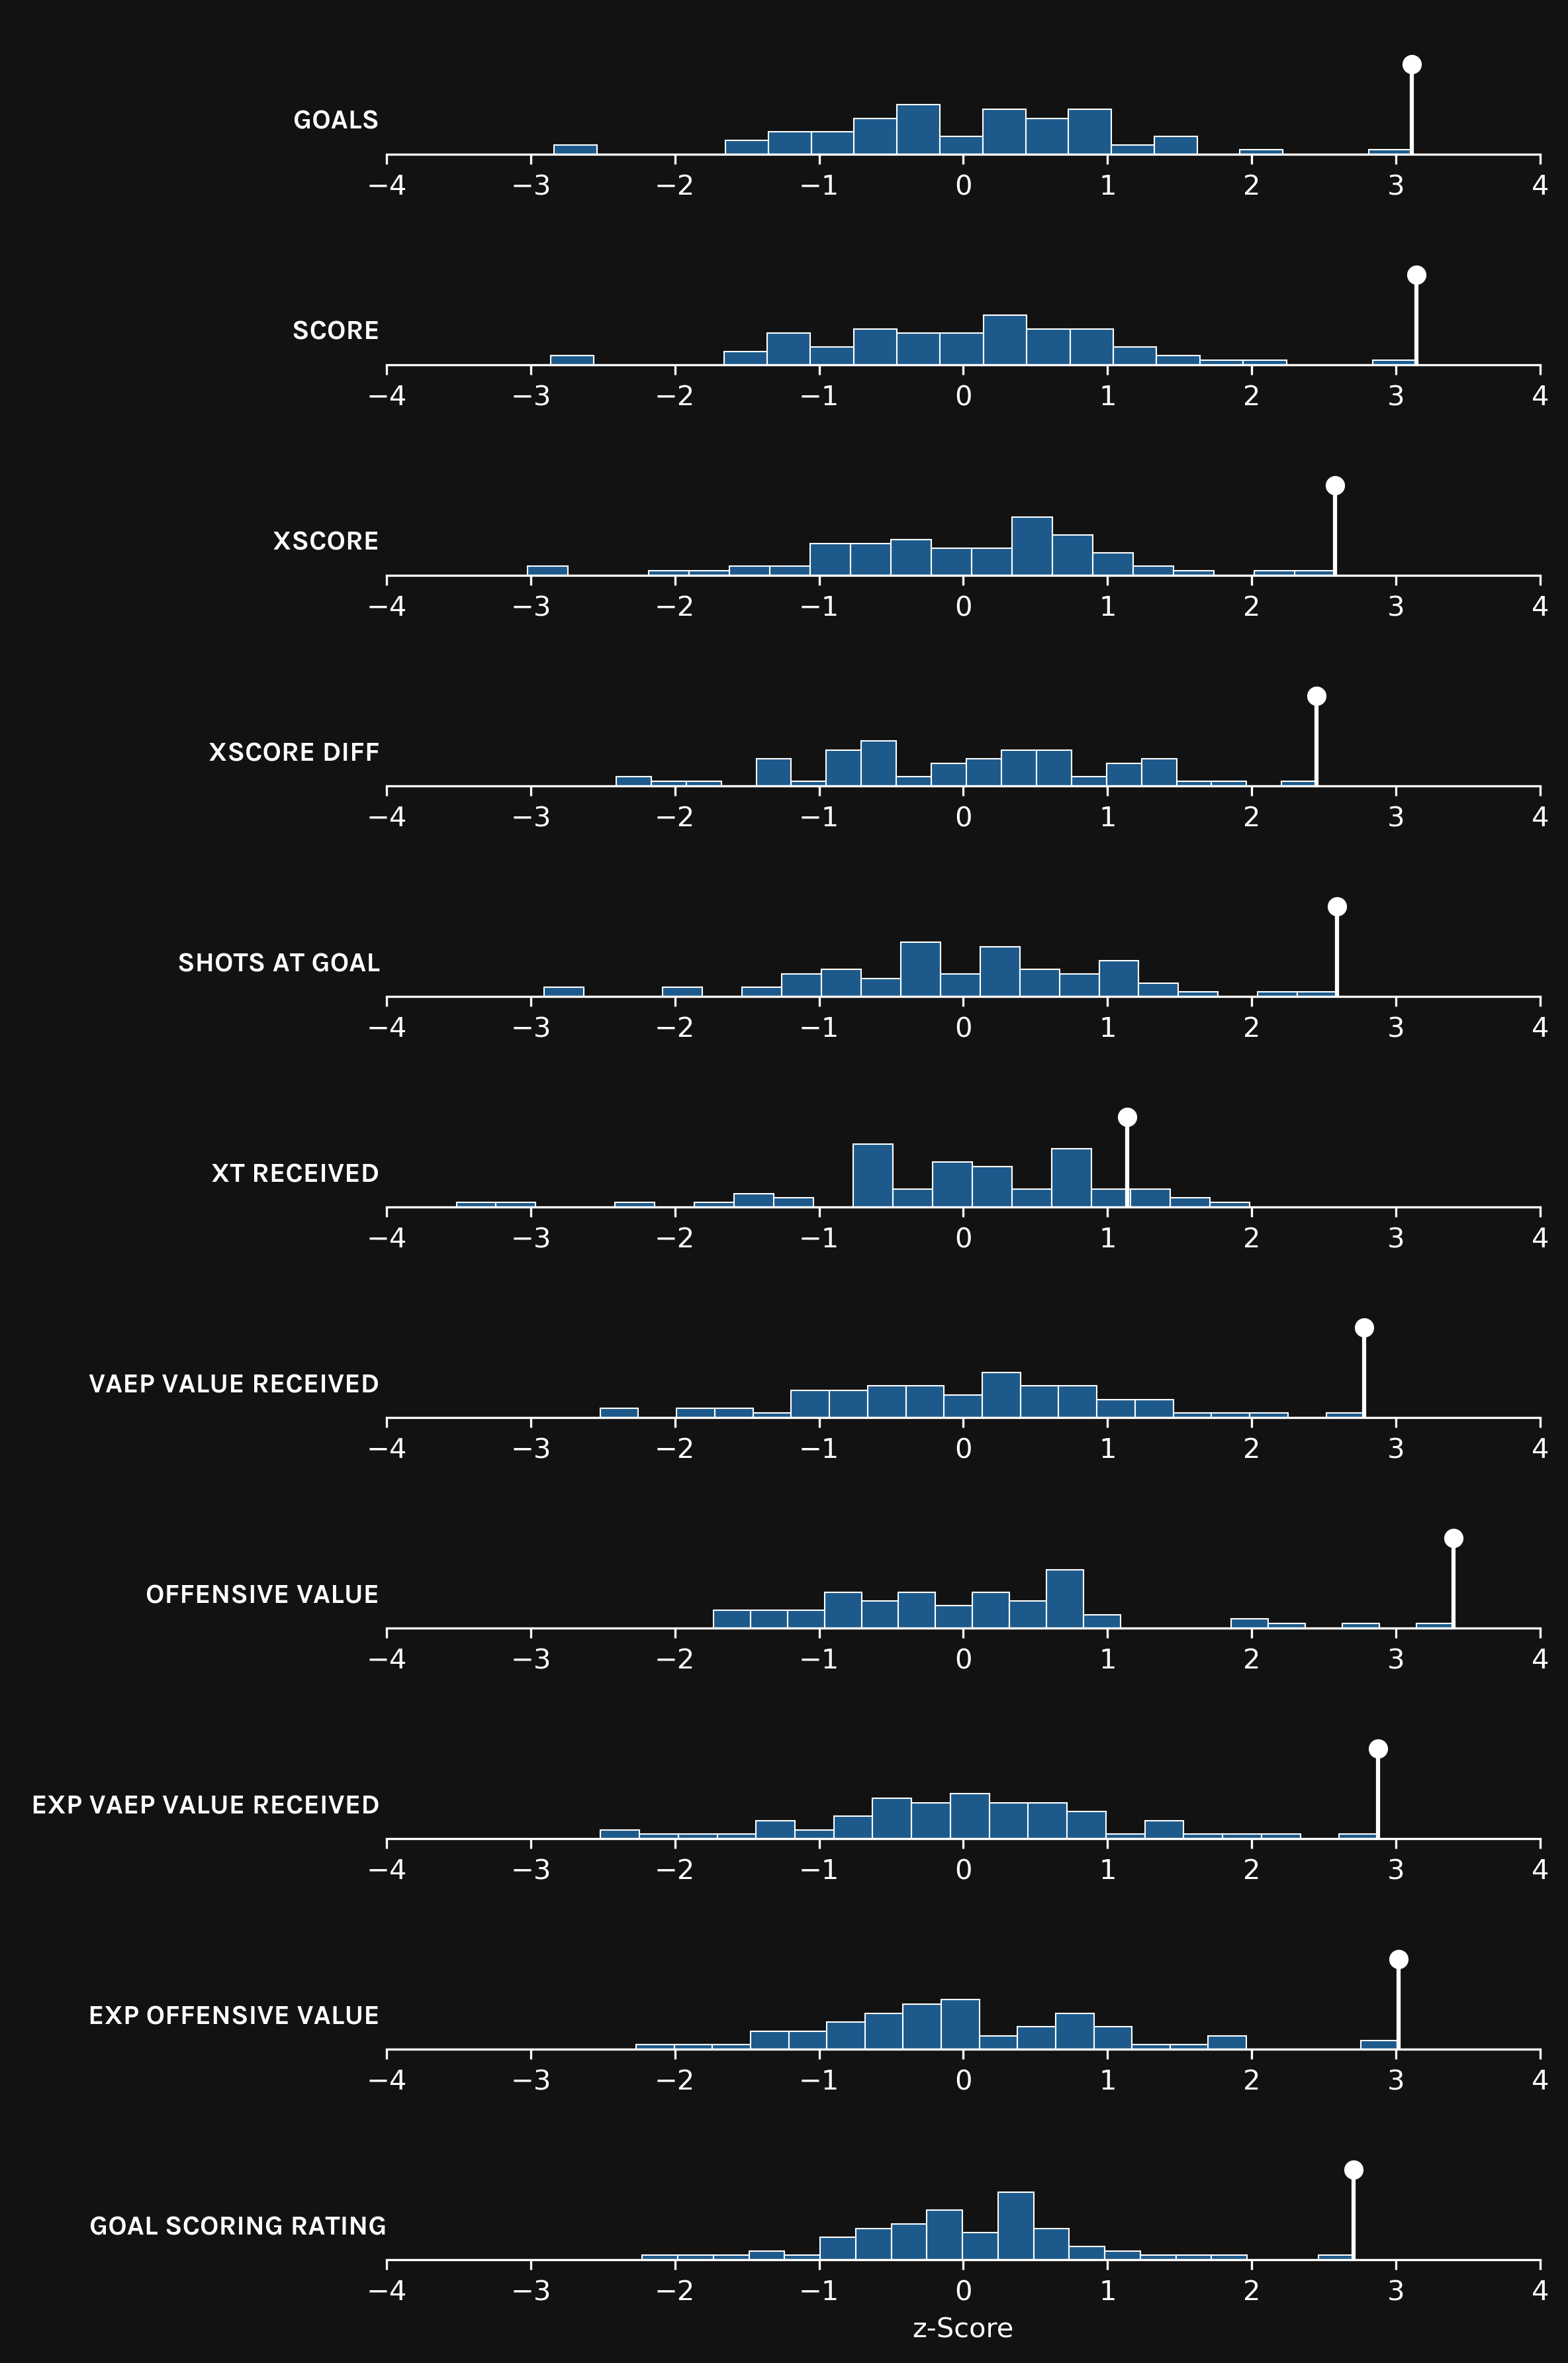

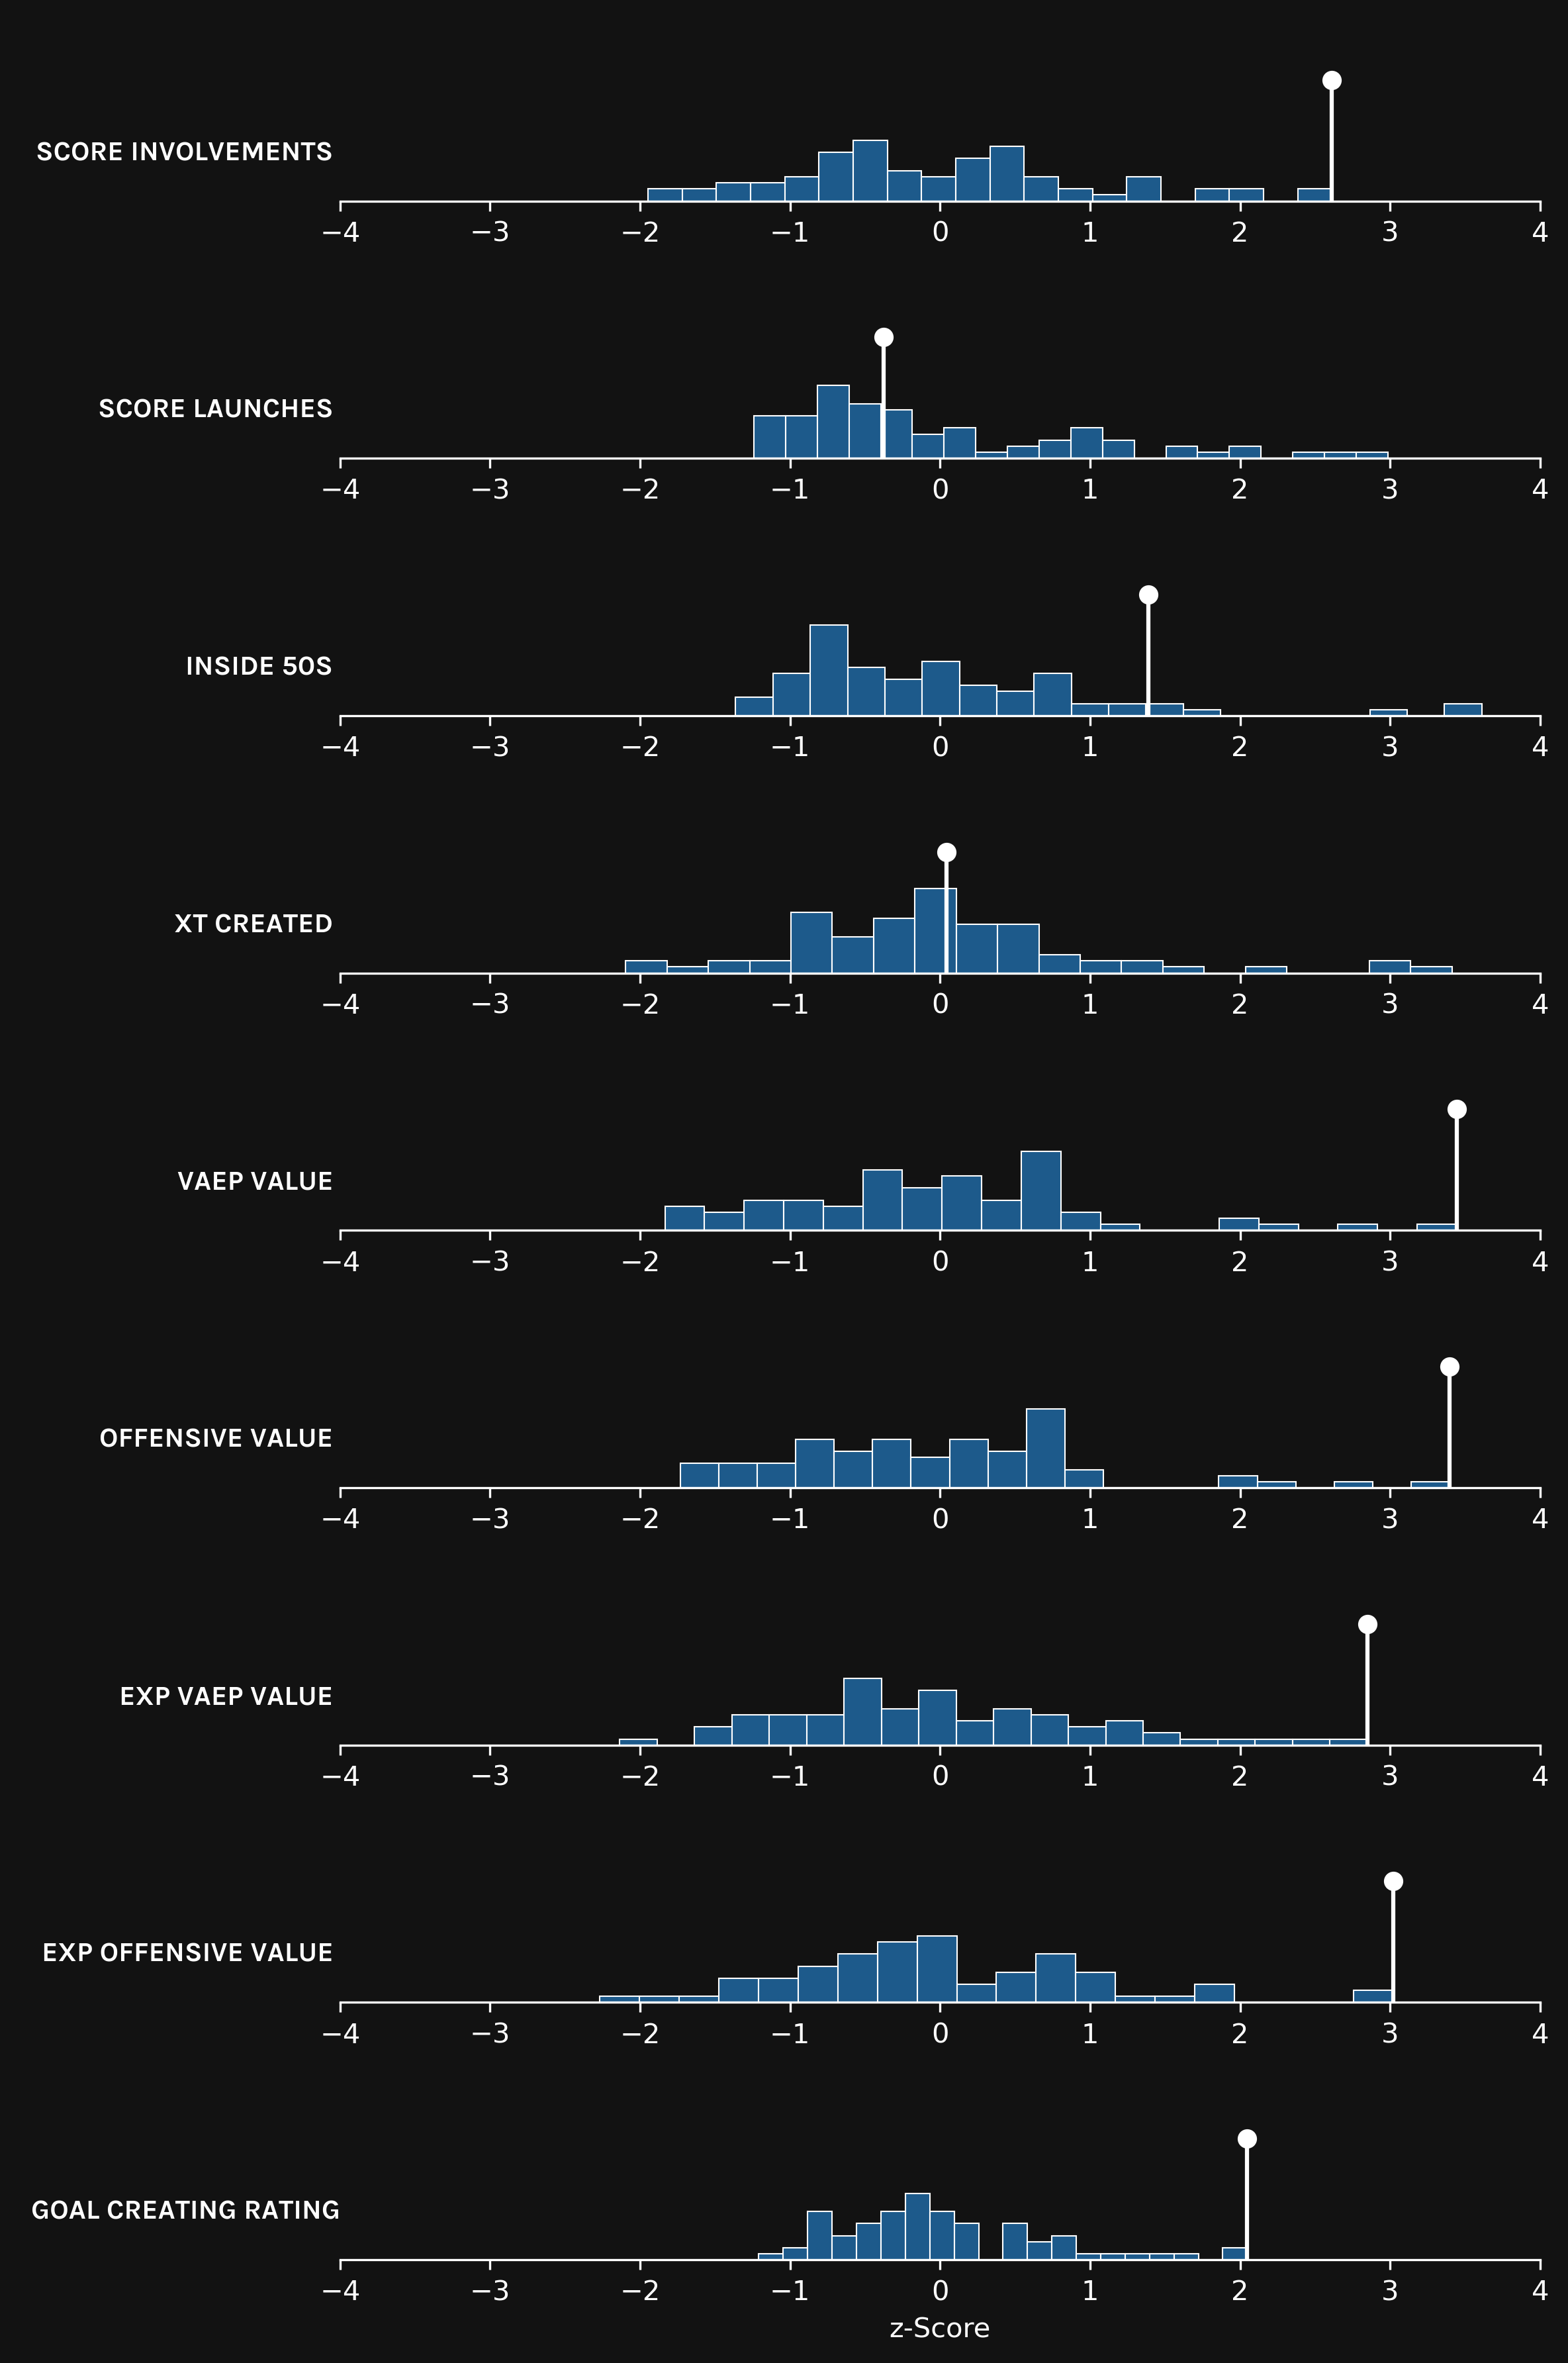

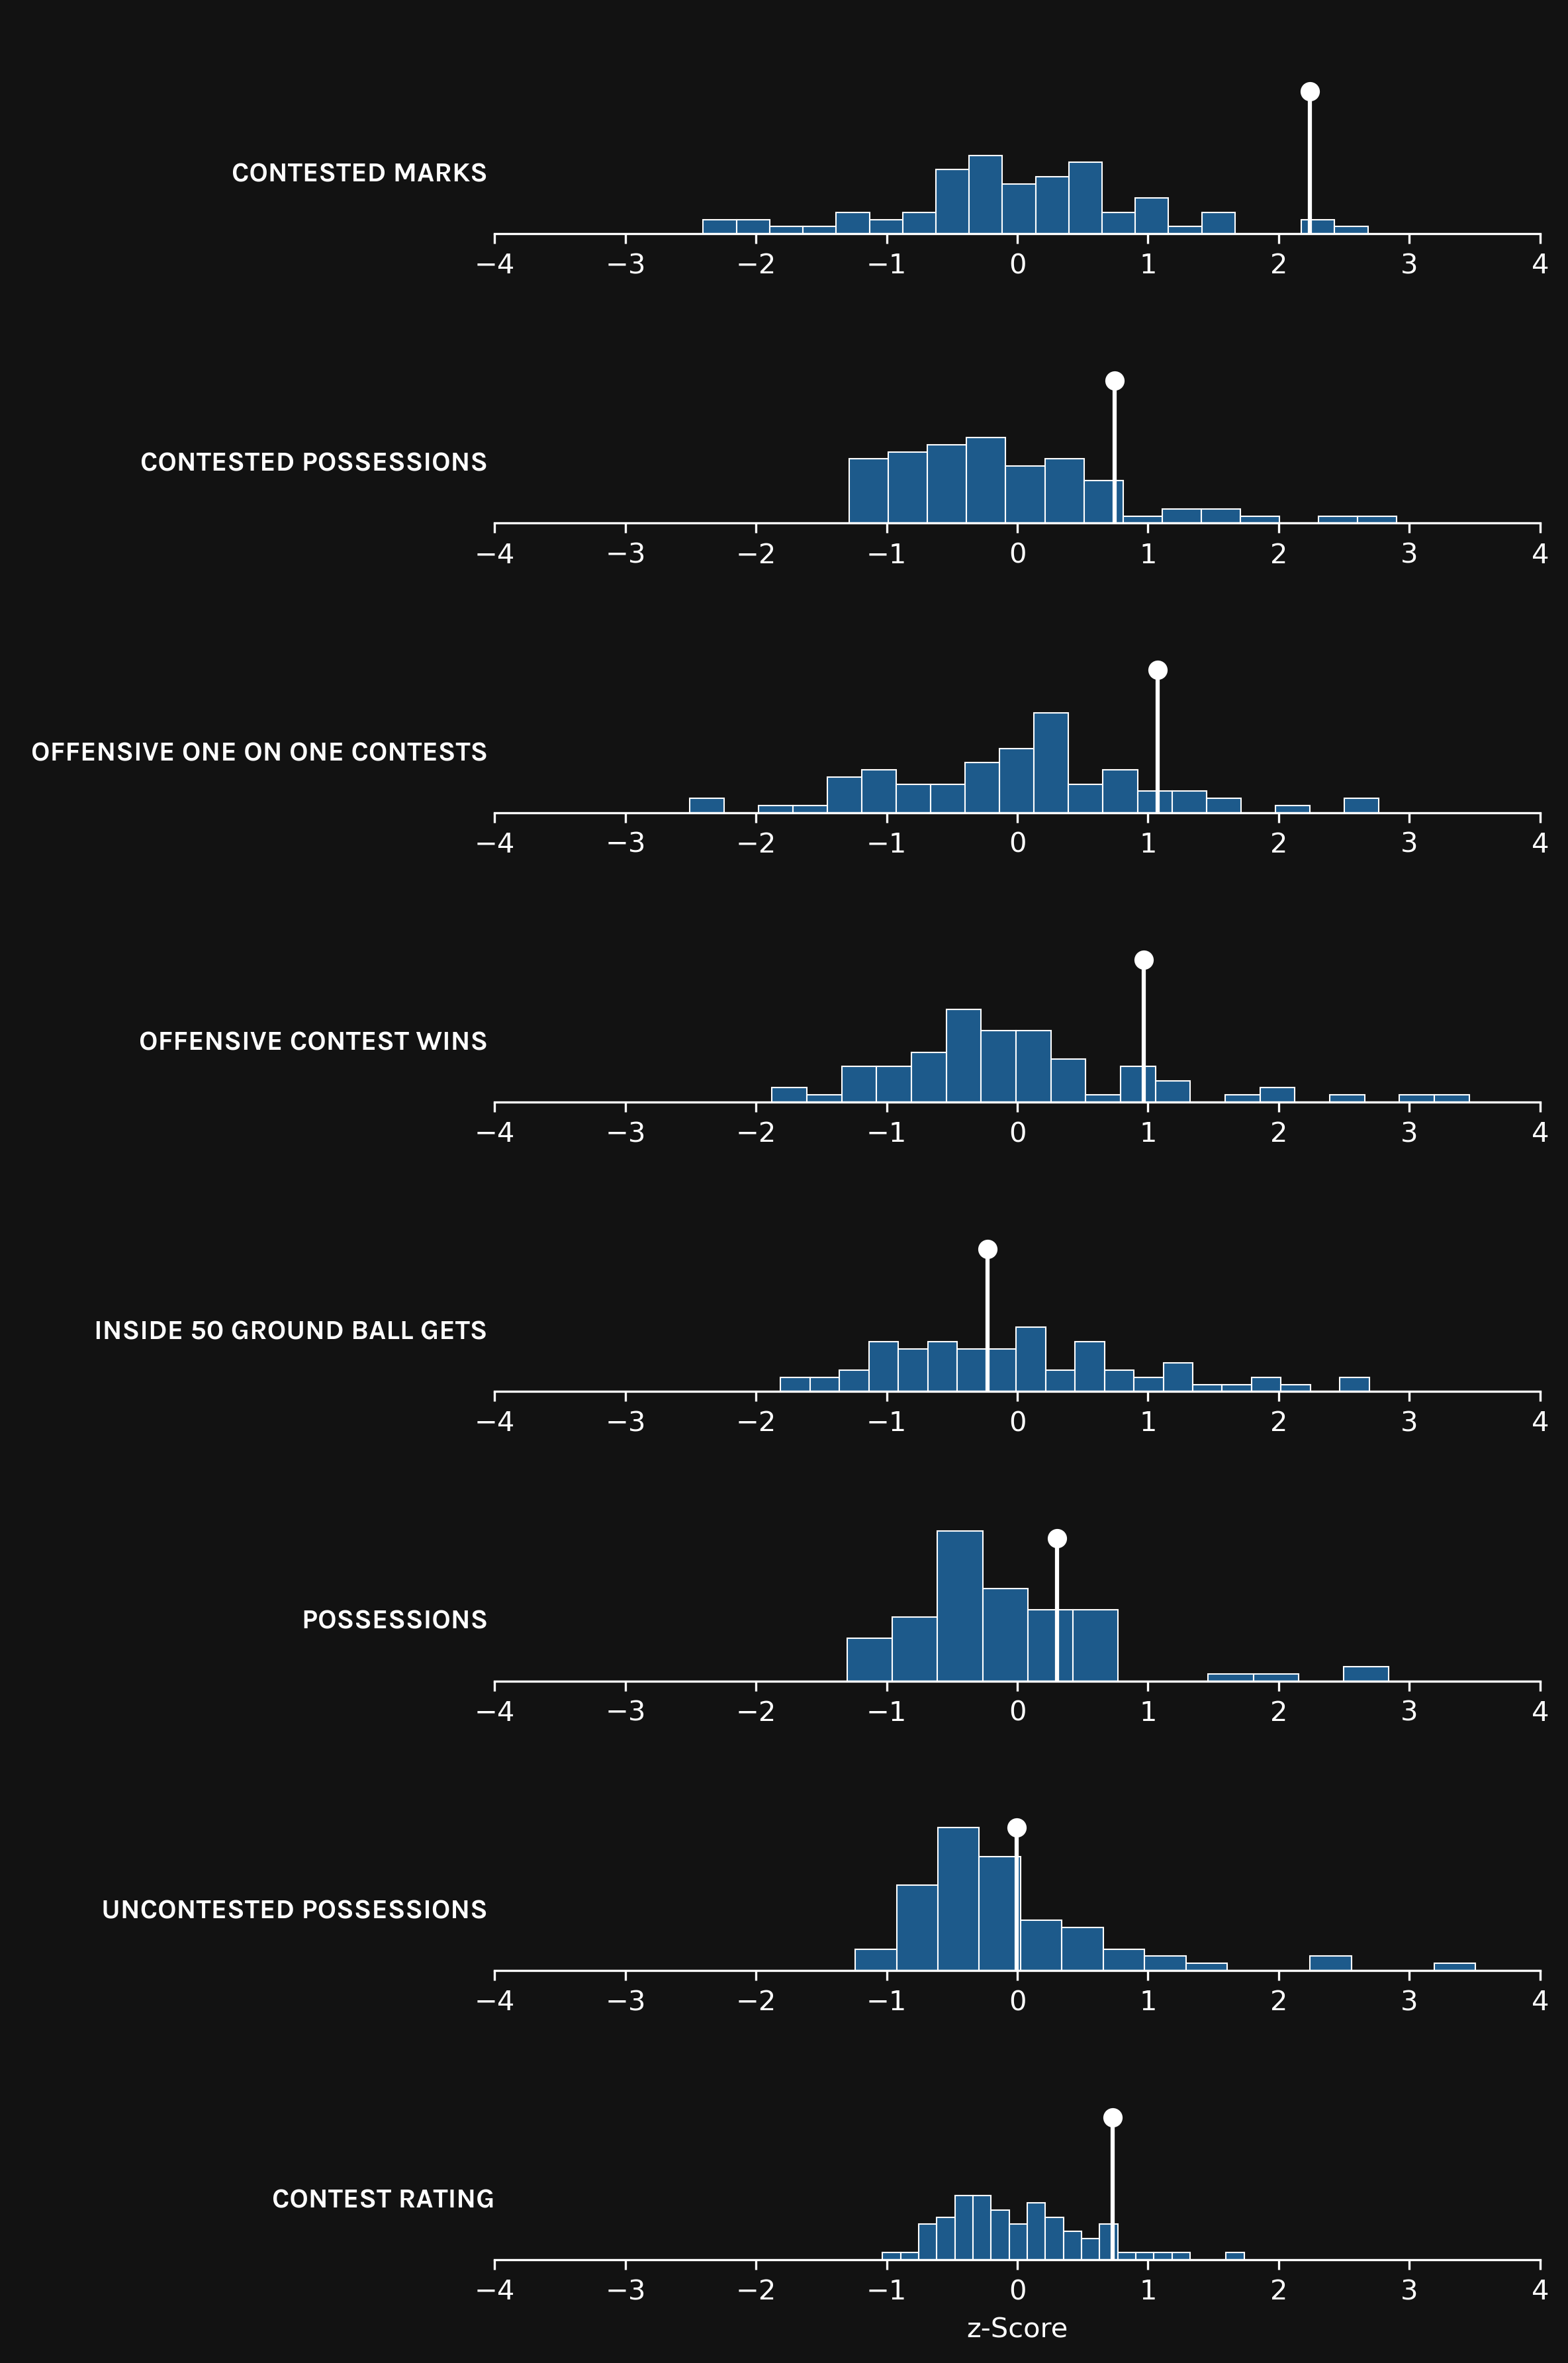

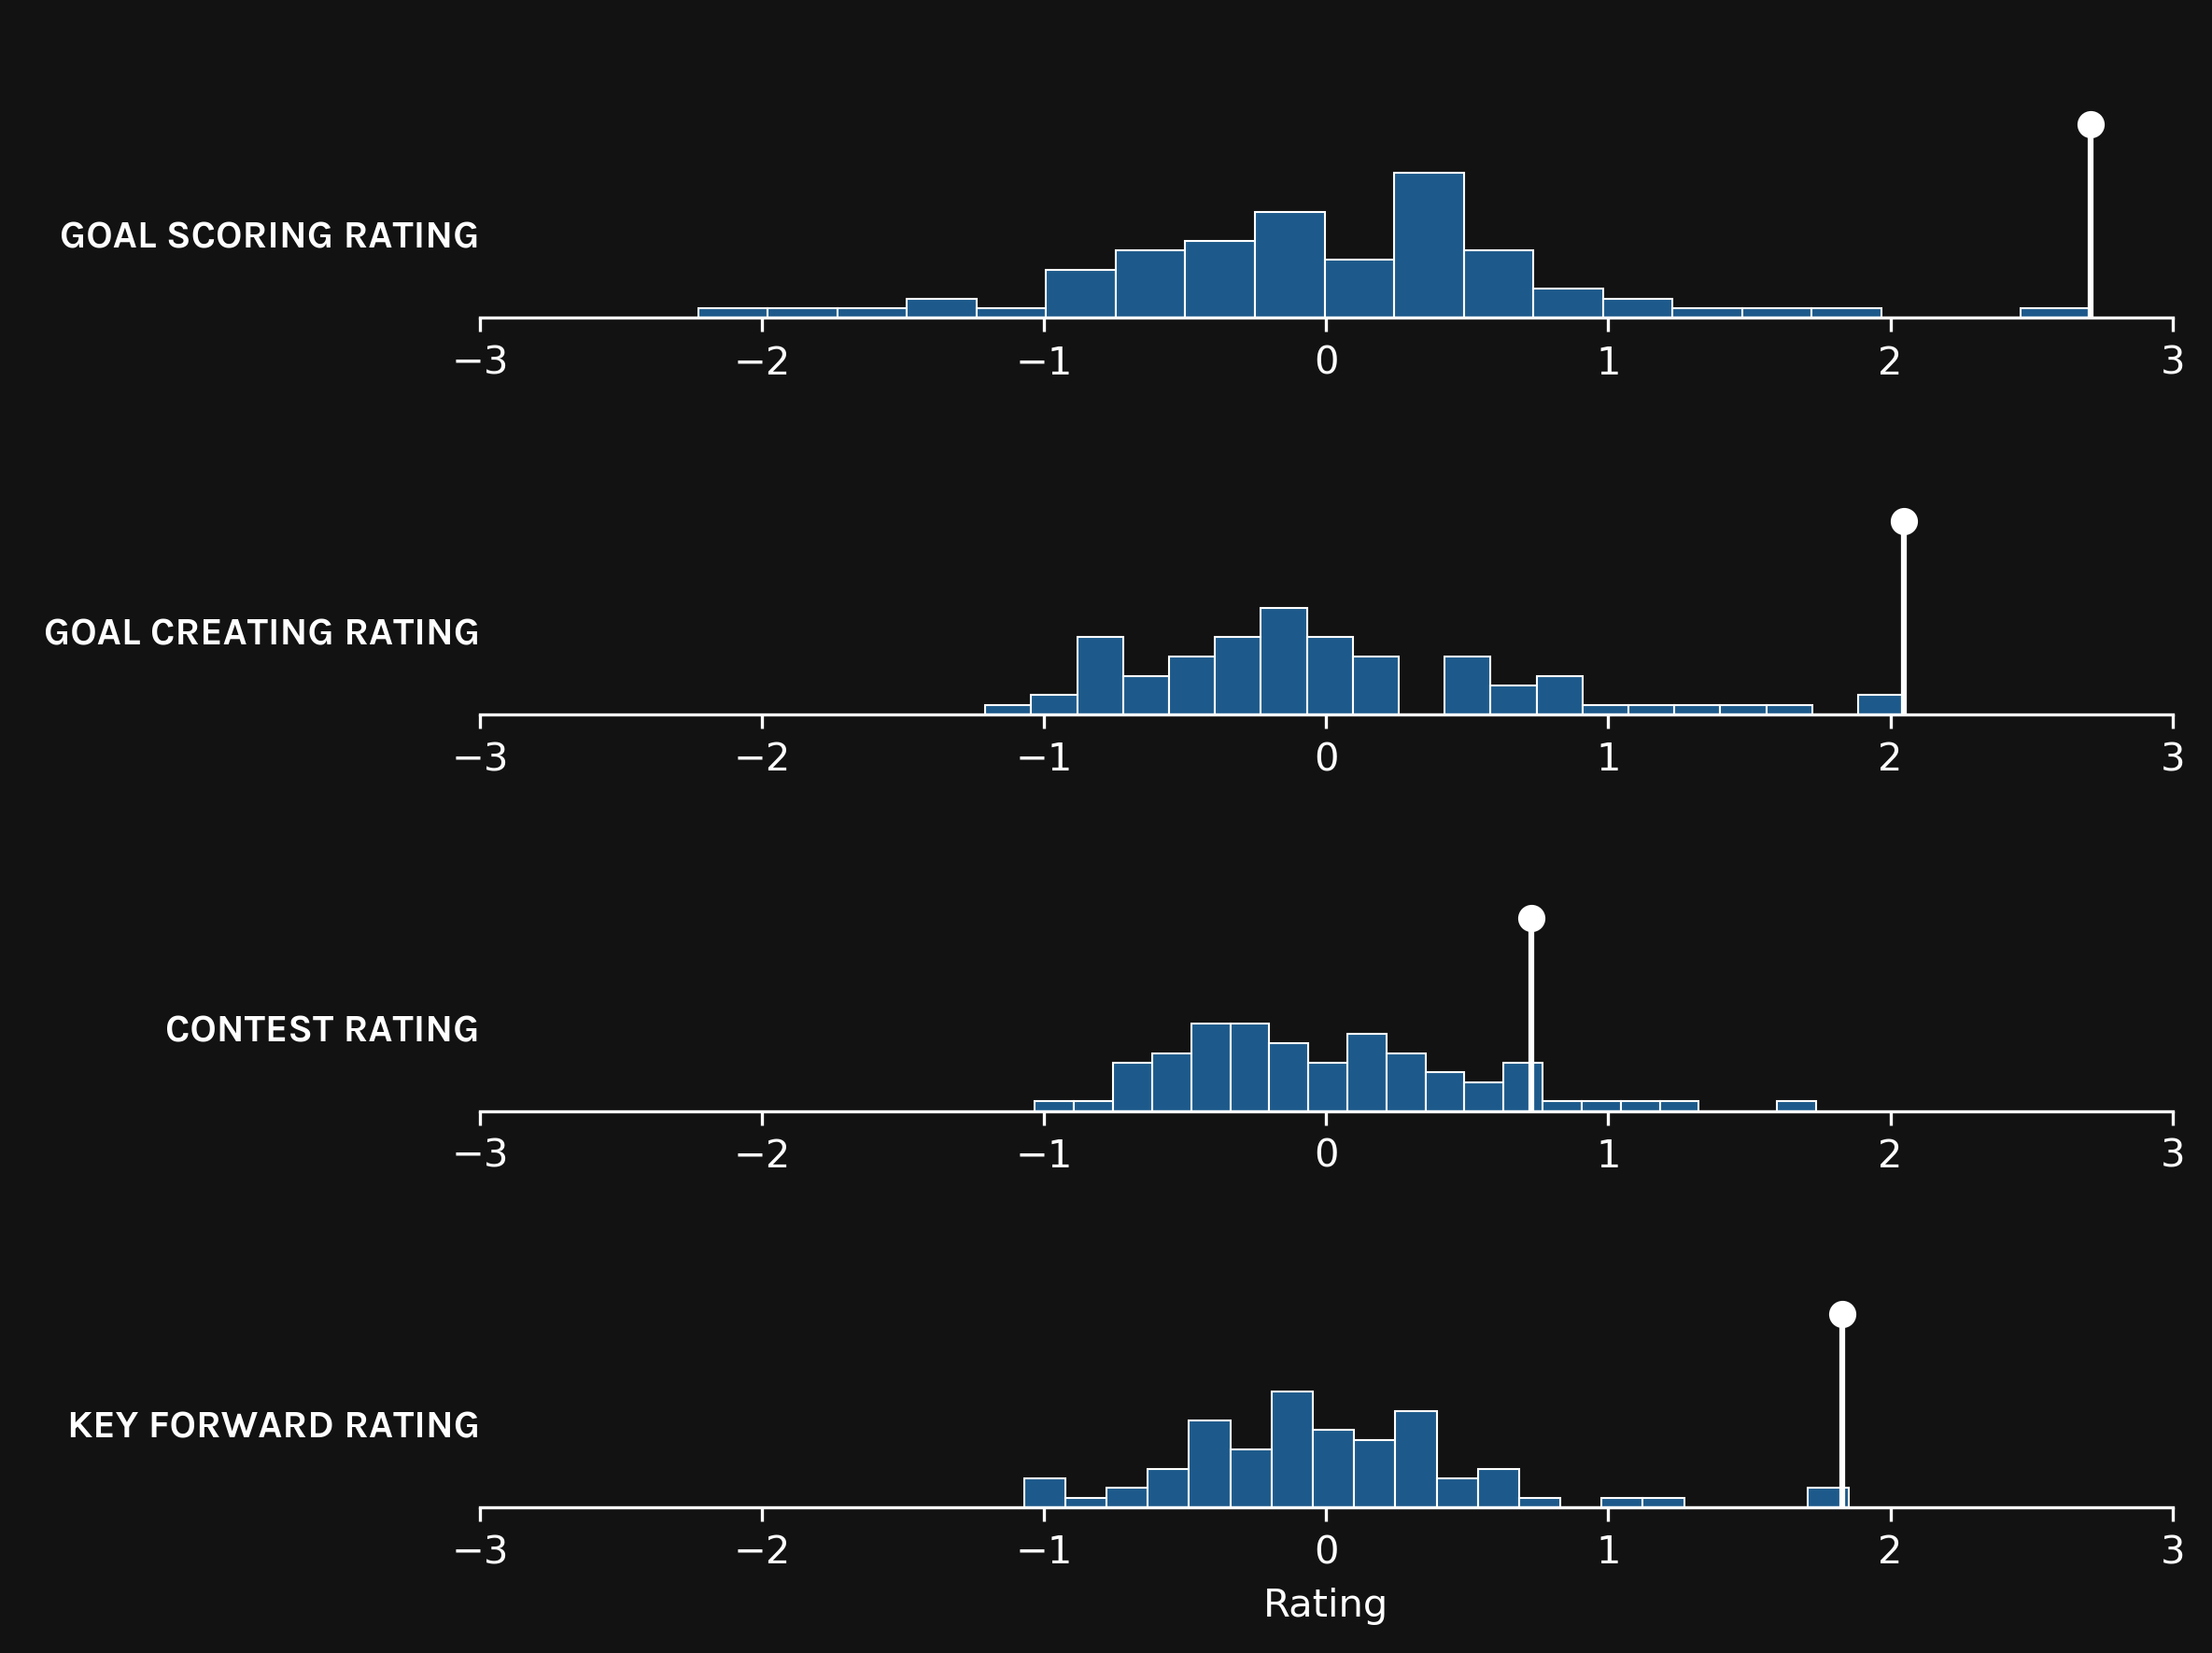

In [16]:
player = "Charlie Curnow"
team = "Carlton"
season = 2023

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    